# Task 4.10 Part 1

## Step 1

In [1]:
# Importing Libraries 
import pandas as pd
import numpy as np
import os
import pickle 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Creating path to data folder
path = r'/Users/farhodfurkatov/Desktop/CF Data Immersion Achievment 4/Instacart Basket Analysis/02 Data'

In [3]:
# Importing Customer_orders data set
df15 = pd.read_pickle(os.path.join(path, 'Prepared Data', 'customer_ords.pkl'))

In [4]:
# Exluding the prices with NAN (which use to be pruducts over $100)
df = df15[df15['prices'].isnull() == False]

In [6]:
# ability to view all the columns 
pd.set_option('display.max_columns', None)

In [7]:
df.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,spend_average,spender_flag,order_frequency,frequency_flag,first_name,last_name,Gender,Age,date_joined,n_dependants,fam_status,income,_merge
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,Mid-range product,Regular busy days,Average orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Linda,Nguyen,Female,31,2/17/2019,3,married,40423,both
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy days,Average orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Linda,Nguyen,Female,31,2/17/2019,3,married,40423,both
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy days,Most Orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Linda,Nguyen,Female,31,2/17/2019,3,married,40423,both
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy days,Average orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Linda,Nguyen,Female,31,2/17/2019,3,married,40423,both
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy days,Most Orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Linda,Nguyen,Female,31,2/17/2019,3,married,40423,both


## Step 2

In [8]:
# In this dataframe we have PII data related to customers, their first and last name

In [9]:
# Dropping first and last names for customers from our dataframe, also dropping the merge column
df2 = df.drop(columns = ['first_name','last_name','_merge'])

In [10]:
df2.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,spend_average,spender_flag,order_frequency,frequency_flag,Gender,Age,date_joined,n_dependants,fam_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,Mid-range product,Regular busy days,Average orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Female,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy days,Average orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Female,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy days,Most Orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Female,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy days,Average orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Female,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy days,Most Orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Female,31,2/17/2019,3,married,40423


## Step 3

In [11]:
# In my previous exercise I have dropped State coulimns as we had same amount of customers for each state (-+1)
# I weill readd the State column for this step purpose 

In [12]:
# Importing Customer data set
cust = pd.read_csv(os.path.join(path, 'Original Data', 'customers.csv'))

In [13]:
cust.head()

,user_id,First Name,Surnam,Gender,STATE,Age,date_joined,n_dependants,fam_status,income
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665
1,33890,Patricia,Hart,Female,New Mexico,36,1/1/2017,0,single,59285
2,65803,Kenneth,Farley,Male,Idaho,35,1/1/2017,2,married,99568
3,125935,Michelle,Hicks,Female,Iowa,40,1/1/2017,0,single,42049
4,130797,Ann,Gilmore,Female,Maryland,26,1/1/2017,1,married,40374


In [14]:
cust[['user_id', 'STATE']]

,user_id,STATE
0,26711,Missouri
1,33890,New Mexico
2,65803,Idaho
3,125935,Iowa
4,130797,Maryland
...,...,...
206204,168073,North Carolina
206205,49635,Hawaii
206206,135902,Missouri
206207,81095,California


In [15]:
#create df with 2 columns to merge with our df_2 dataframe 
cust_state = cust[['user_id', 'STATE']]

In [16]:
#check
cust_state.head(10)

,user_id,STATE
0,26711,Missouri
1,33890,New Mexico
2,65803,Idaho
3,125935,Iowa
4,130797,Maryland
5,133128,Kentucky
6,152052,Montana
7,168851,South Carolina
8,69965,Texas
9,82820,Virginia


In [17]:
# creating the regions column
result = []

for value in cust_state['STATE']:
    
    if value == 'Maine' or value == 'New Hampshire' or value == 'Vermont' or value == 'Massachusetts' or value == 'Rhode Island' or value == 'Connecticut' or value == 'New York' or value == 'New Jersey' or value == 'Pennsylvania':
        result.append('Northeast')
    elif value == 'Wisconsin' or value == 'Michigan' or value == 'Illinois' or value == 'Indiana' or value == 'Ohio' or value == 'North Dakota' or value == 'South Dakota' or value == 'Nebraska' or value == 'Kansas' or value == 'Minnesota' or value == 'Iowa' or value == 'Missouri' :
        result.append('Midwest')
    elif value == 'Delaware' or value == 'Maryland' or value == 'District of Columbia' or value == 'Virginia' or value == 'West Virginia' or value == 'North Carolina' or value == 'South Carolina' or value == 'Georgia' or value == 'Florida' or value == 'Kentucky' or value == 'Tennessee' or value == 'Mississippi' or value == 'Alabama' or value == 'Oklahoma' or value == 'Texas' or value == 'Arkansas' or value == 'Louisiana':
        result.append('South')
    else:
        result.append('West')

In [18]:
result

['Midwest',
 'West',
 'West',
 'Midwest',
 'South',
 'South',
 'West',
 'South',
 'South',
 'South',
 'West',
 'Midwest',
 'South',
 'West',
 'West',
 'Midwest',
 'Midwest',
 'Midwest',
 'West',
 'Northeast',
 'Midwest',
 'South',
 'Northeast',
 'South',
 'West',
 'West',
 'South',
 'Midwest',
 'West',
 'South',
 'South',
 'West',
 'West',
 'Northeast',
 'West',
 'Midwest',
 'Northeast',
 'West',
 'South',
 'Midwest',
 'West',
 'Midwest',
 'Northeast',
 'Northeast',
 'West',
 'Northeast',
 'West',
 'Midwest',
 'South',
 'South',
 'Midwest',
 'West',
 'West',
 'West',
 'South',
 'West',
 'Midwest',
 'South',
 'Midwest',
 'West',
 'South',
 'West',
 'West',
 'West',
 'Midwest',
 'West',
 'West',
 'West',
 'Northeast',
 'West',
 'South',
 'Northeast',
 'Northeast',
 'South',
 'Northeast',
 'Northeast',
 'West',
 'West',
 'Northeast',
 'Midwest',
 'West',
 'South',
 'West',
 'Northeast',
 'South',
 'Midwest',
 'South',
 'West',
 'Midwest',
 'West',
 'Northeast',
 'South',
 'South',
 'Midwe

In [19]:
# adding new column to our datafram
cust_state['Region'] = result

/Users/farhodfurkatov/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [20]:
# check
cust_state.head(20)

,user_id,STATE,Region
0,26711,Missouri,Midwest
1,33890,New Mexico,West
2,65803,Idaho,West
3,125935,Iowa,Midwest
4,130797,Maryland,South
5,133128,Kentucky,South
6,152052,Montana,West
7,168851,South Carolina,South
8,69965,Texas,South
9,82820,Virginia,South


In [21]:
# Converting datatype to object
df_cust_state = cust_state.astype('str')

In [22]:
# merging 2 dataframes
df3 = df2.merge(df_cust_state, on = ['user_id'])

In [23]:
df3.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,spend_average,spender_flag,order_frequency,frequency_flag,Gender,Age,date_joined,n_dependants,fam_status,income,STATE,Region
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,Mid-range product,Regular busy days,Average orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Female,31,2/17/2019,3,married,40423,Alabama,South
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy days,Average orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Female,31,2/17/2019,3,married,40423,Alabama,South
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy days,Most Orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Female,31,2/17/2019,3,married,40423,Alabama,South
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy days,Average orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Female,31,2/17/2019,3,married,40423,Alabama,South
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy days,Most Orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Female,31,2/17/2019,3,married,40423,Alabama,South


In [24]:
# Looking at spending Habits between different regions
df3.groupby('Region')['spender_flag'].value_counts()

Region     spender_flag
Midwest    Low Spender      7447454
           High Spender      154836
Northeast  Low Spender      5619809
           High Spender      107491
South      Low Spender     10591069
           High Spender      208337
West       Low Spender      8139372
           High Spender      159535
Name: spender_flag, dtype: int64

In [25]:
# Spenders accross diferent regions are very similar with ratio aproximatelly being 5/1, Low Spenders 5 time more than high spenders

## Step 4

In [26]:
# Checking the shape of our DF
df3.shape

(32427903, 30)

In [27]:
# Will create new df without customers who placed less than 5 orders
df_active_cust = df3[df3['max_order'] > 5]

In [28]:
df_active_cust.shape

(30193029, 30)

In [29]:
df_active_cust.to_pickle(os.path.join(path, 'Prepared Data', 'active_cust.pkl'))

## Step 5, 6

In [30]:
df3['fam_status'].unique()

array(['married', 'divorced/widowed', 'single',
       'living with parents and siblings'], dtype=object)

In [31]:
df3['n_dependants'].unique()

array([3, 0, 1, 2])

In [32]:
# I will be creating 70/30 sample Data from our dataframe 
np.random.seed(7)
dev = np.random.rand(len(df3)) <= 0.7

In [33]:
dev

array([ True, False,  True, ..., False, False,  True])

In [34]:
# Store 70% data in df big
big = df3[dev]

In [35]:
# Store 30% data in df small 
small = df3[~dev]

In [36]:
#check 
small.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,spend_average,spender_flag,order_frequency,frequency_flag,Gender,Age,date_joined,n_dependants,fam_status,income,STATE,Region
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy days,Average orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Female,31,2/17/2019,3,married,40423,Alabama,South
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy days,Average orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Female,31,2/17/2019,3,married,40423,Alabama,South
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy days,Most Orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Female,31,2/17/2019,3,married,40423,Alabama,South
11,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,23,19,4.4,Low-range product,Regular busy days,Average orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Female,31,2/17/2019,3,married,40423,Alabama,South
15,431534,1,5,4,15,28.0,12427,2,1,Original Beef Jerky,23,19,4.4,Low-range product,Least busy days,Most Orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Female,31,2/17/2019,3,married,40423,Alabama,South


In [37]:
small.shape

(9727922, 30)

In [38]:
# Creating Custumer Profiles
# Young Single Adults 
small.loc[(small['fam_status'] == 'single') & (small['Age'] >= 30), 'cust_profile'] = 'Young_single'               
          

/Users/farhodfurkatov/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/farhodfurkatov/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [39]:
# Young Families with kids who is age 30 and under
small.loc[(small['fam_status'] == 'married') & (small['Age'] <= 30) & (small['n_dependants'] > 0), 'cust_profile'] = 'Young_family'

In [40]:
# Young Married with no kids
small.loc[(small['fam_status'] == 'married') & (small['n_dependants'] == 0), 'cust_profile'] = 'family_no_kids'

In [41]:
# Families
small.loc[(small['fam_status'] == 'married') & (small['Age'] > 30) & (small['n_dependants'] > 0), 'cust_profile'] = 'Family_with_kids'

In [42]:
# Single Adults 
small.loc[(small['fam_status'] == 'divorced/widowed'), 'cust_profile'] = 'Other_Single'  

In [43]:
# Living with parents
small.loc[(small['fam_status'] == 'living with parents and siblings'), 'cust_profile'] = 'Live_with_parents'  

In [44]:
# assigning other to rst of the customers
small['cust_profile'] = small['cust_profile'].fillna('Other')

/Users/farhodfurkatov/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [45]:
small['cust_profile'].value_counts(dropna = False)

Family_with_kids     5811384
Young_single         1144325
Young_family         1022023
Other_Single          831800
Live_with_parents     464866
Other                 453524
Name: cust_profile, dtype: int64

In [46]:
small.head(50)

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,spend_average,spender_flag,order_frequency,frequency_flag,Gender,Age,date_joined,n_dependants,fam_status,income,STATE,Region,cust_profile
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy days,Average orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Female,31,2/17/2019,3,married,40423,Alabama,South,Family_with_kids
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy days,Average orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Female,31,2/17/2019,3,married,40423,Alabama,South,Family_with_kids
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy days,Most Orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Female,31,2/17/2019,3,married,40423,Alabama,South,Family_with_kids
11,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,23,19,4.4,Low-range product,Regular busy days,Average orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Female,31,2/17/2019,3,married,40423,Alabama,South,Family_with_kids
15,431534,1,5,4,15,28.0,12427,2,1,Original Beef Jerky,23,19,4.4,Low-range product,Least busy days,Most Orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Female,31,2/17/2019,3,married,40423,Alabama,South,Family_with_kids
18,3108588,1,8,1,14,14.0,12427,1,1,Original Beef Jerky,23,19,4.4,Low-range product,Busiest days,Most Orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Female,31,2/17/2019,3,married,40423,Alabama,South,Family_with_kids
21,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,23,19,4.7,Low-range product,Regular busy days,Average orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Female,31,2/17/2019,3,married,40423,Alabama,South,Family_with_kids
24,2254736,1,4,4,7,29.0,26405,5,1,XL Pick-A-Size Paper Towel Rolls,54,17,1.0,Low-range product,Least busy days,Average orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Female,31,2/17/2019,3,married,40423,Alabama,South,Family_with_kids
27,2254736,1,4,4,7,29.0,10258,3,1,Pistachios,117,19,3.0,Low-range product,Least busy days,Average orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Female,31,2/17/2019,3,married,40423,Alabama,South,Family_with_kids
35,431534,1,5,4,15,28.0,13176,8,1,Bag of Organic Bananas,24,4,10.3,Mid-range product,Least busy days,Most Orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Female,31,2/17/2019,3,married,40423,Alabama,South,Family_with_kids


In [47]:
# Increase size of the graphs 
sns.set(rc={'figure.figsize':(12,10)})

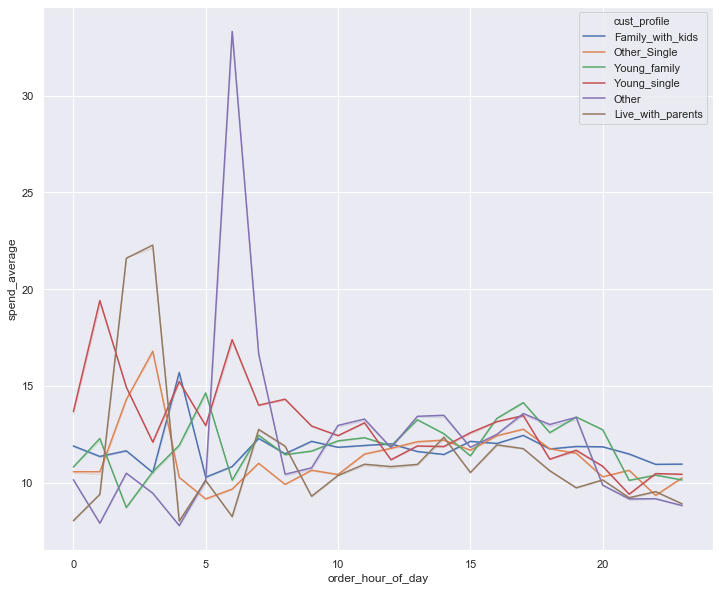

In [48]:
# Creating graph to look average spend throughout the day bu cutomer profile
ax = sns.lineplot(x = 'order_hour_of_day', y = 'spend_average', hue = 'cust_profile', data = small, ci = False)

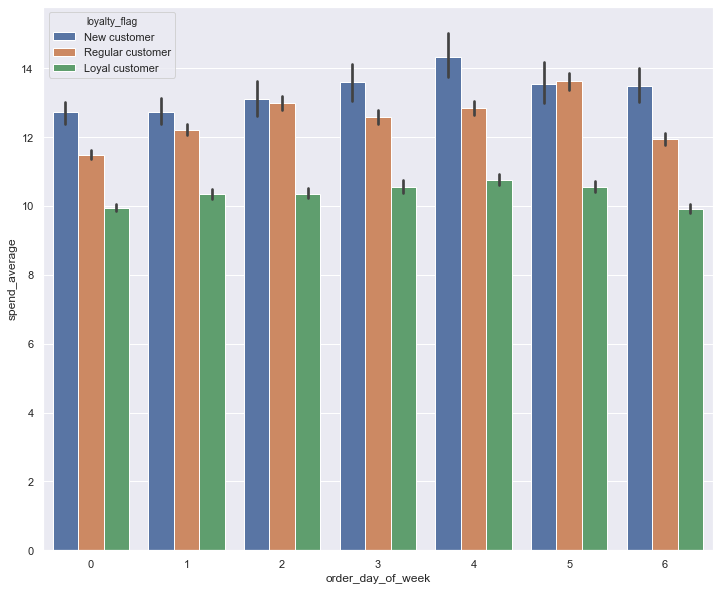

In [75]:
# Creating graph to look average spend throughout the week by cutomer loyalty
fx = sns.barplot(x = 'order_day_of_week', y = 'spend_average', hue = 'loyalty_flag', data = small)


In [76]:
fx.figure.savefig(os.path.join(path, 'avgspentweek_loyaltcust.png'))

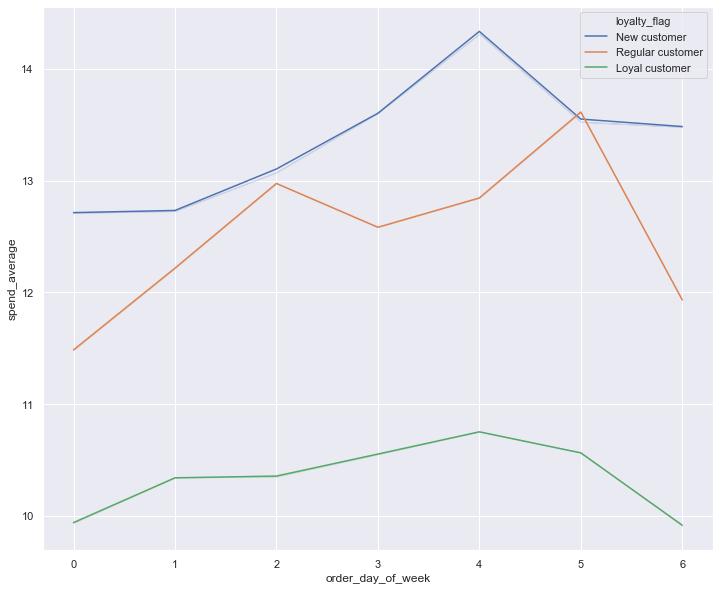

In [73]:
# Creating graph to look average spend throughout the day bu loyalty level
ex = sns.lineplot(x = 'order_day_of_week', y = 'spend_average', hue = 'loyalty_flag', data = small, ci = False)

In [74]:
#Saving it
ex.figure.savefig(os.path.join(path, 'avgspentweek_loyalcust.png'))

## Step 7,8 

In [49]:
# Income by customer profile
income_by_profile = small.groupby('cust_profile', sort = False).agg({'income': ['mean', 'min', 'max']})

In [50]:
income_by_profile

income               
                            mean    min     max
cust_profile                                   
Family_with_kids   106732.981456  25911  593901
Other_Single       115662.466035  29005  578251
Young_family        70377.545370  26006  392552
Young_single        99668.062436  25903  584097
Other               70334.148224  25979  385324
Live_with_parents   70647.276320  25937  396364

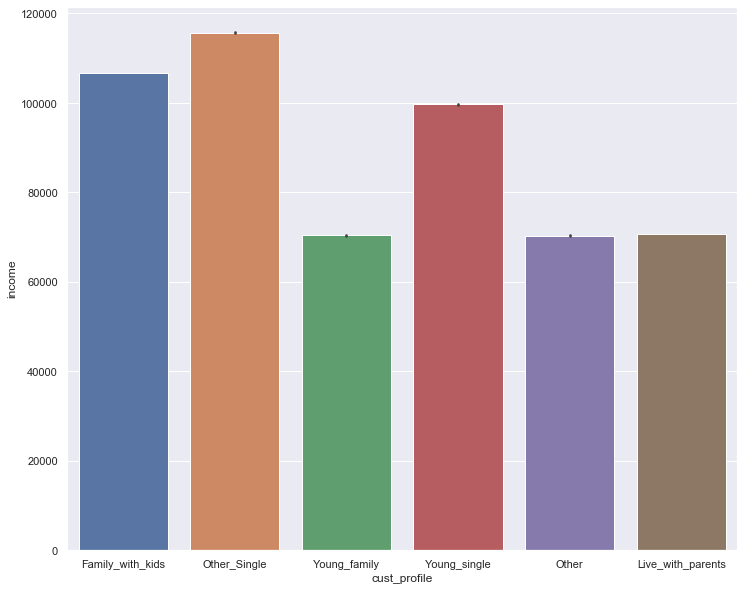

In [51]:
# Looking at our custumer profile and their Average Income 
bx = sns.barplot(x = 'cust_profile', y = 'income', data = small)

In [52]:
# Income by customer profile
order_freq_by_profile = small.groupby('cust_profile', sort = False).agg({'order_frequency': ['mean', 'min', 'max']})

In [53]:
order_freq_by_profile

order_frequency           
                             mean  min   max
cust_profile                                
Family_with_kids        10.414659  0.0  30.0
Other_Single            10.297443  0.0  30.0
Young_family            10.407691  0.0  30.0
Young_single            10.349741  0.0  30.0
Other                   10.486575  0.0  30.0
Live_with_parents       10.316483  0.0  30.0

In [54]:
# Expenditure by customer profile
spend_by_profile = small.groupby('cust_profile', sort = False).agg({'spend_average': ['mean', 'min', 'max']})

In [55]:
spend_by_profile

spend_average                   
                           mean  min           max
cust_profile                                      
Family_with_kids      11.852444  1.0  12506.925000
Other_Single          11.422611  1.2  14042.512281
Young_family          12.305189  1.1   4924.385246
Young_single          12.429458  1.0  15006.940000
Other                 12.527134  1.3   8794.882427
Live_with_parents     10.882455  1.3  10209.987755

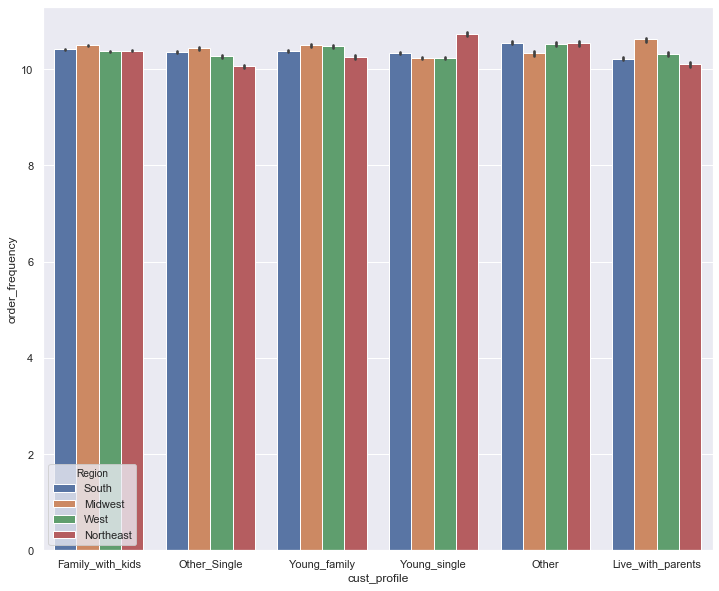

In [56]:
# Looking at our custumer profile and their Average Income 
cx = sns.barplot(x = 'cust_profile', y = 'order_frequency', hue = 'Region', data = small)

In [130]:
# Save the pic
cx.figure.savefig(os.path.join(path, 'region_order_freq.png'))

# Data for Part 2

## Q3

In [79]:
# Values for price_tag
df3['price_range_loc'].value_counts(dropna = False)

Mid-range product     21889009
Low-range product     10126339
High-range product      412555
Name: price_range_loc, dtype: int64

In [ ]:
crosstab = pd.crosstab(df3['days_since_prior_order'], df3['order_number'], dropna = False)

In [ ]:
crosstab.to_clipboard()

## Q4

In [84]:
# Import departments dataset
dep = pd.read_csv(os.path.join(path, 'Prepared Data', 'dep_wrangled.csv'), index_col = False)

In [85]:
# Check
dep.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [86]:
# Merge departments dataset to our dataframe to add department names
df4 = df3.merge(dep, on = ['department_id'])

In [87]:
# Check
df4.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,spend_average,spender_flag,order_frequency,frequency_flag,Gender,Age,date_joined,n_dependants,fam_status,income,STATE,Region,department
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,Mid-range product,Regular busy days,Average orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Female,31,2/17/2019,3,married,40423,Alabama,South,beverages
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy days,Average orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Female,31,2/17/2019,3,married,40423,Alabama,South,beverages
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy days,Most Orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Female,31,2/17/2019,3,married,40423,Alabama,South,beverages
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy days,Average orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Female,31,2/17/2019,3,married,40423,Alabama,South,beverages
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy days,Most Orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Female,31,2/17/2019,3,married,40423,Alabama,South,beverages


In [94]:
# Looking at departments with highest order numbers
dep_ord = df4.groupby('department').agg({'order_id': ['count']})

In [99]:
dep_ord

,order_id
,count
department,
alcohol,153696
babies,423802
bakery,1176787
beverages,2688159
breakfast,709569
bulk,34573
canned goods,1068058
dairy eggs,5408889


In [100]:
# saving newly created df
dep_ord.to_csv(os.path.join(path, 'Prepared Data', 'dep_ord.csv'))

In [103]:
# importing df
dep_ord1 = pd.read_csv(os.path.join(path, 'Prepared Data', 'dep_ord.csv'), index_col = False)

In [104]:
# check
dep_ord1.head(3)

,department,number_of_orders
0,alcohol,153696
1,babies,423802
2,bakery,1176787


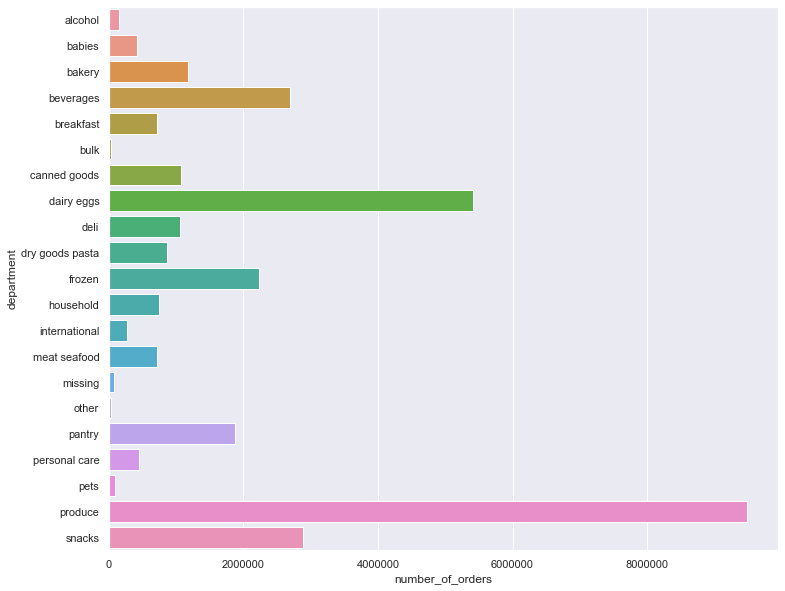

In [122]:
# bar plot to see prodects ordered from each departments 
gx = sns.barplot(x = 'number_of_orders', y = 'department', orient = 'h' , data = dep_ord1)

In [123]:
# Saving the fig
gx.figure.savefig(os.path.join(path, 'depart_ord.png'))

## Q5

In [124]:
# Grouping data to see how often customers order from instacart 
order_freq = small.groupby('loyalty_flag').agg({'days_since_prior_order': ['mean']})

In [125]:
# result
order_freq

,days_since_prior_order
,mean
loyalty_flag,
Loyal customer,6.026602
New customer,17.974080
Regular customer,12.157718


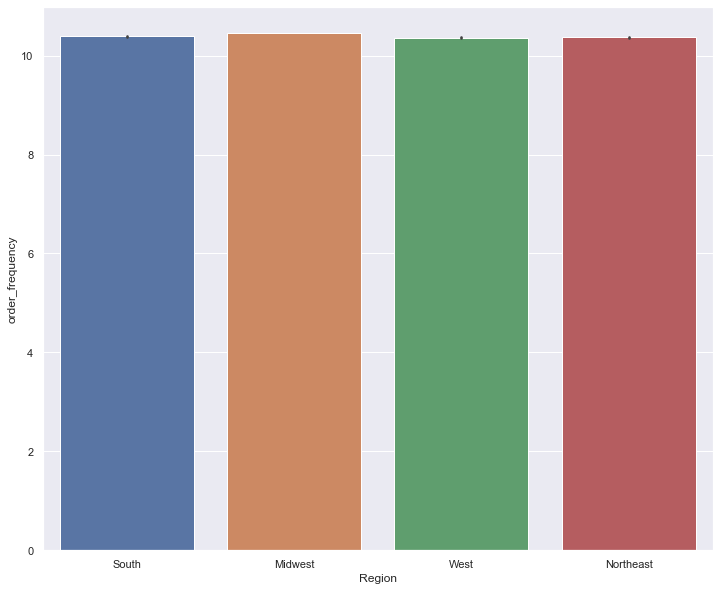

In [131]:
# bar plot to see prodects ordered from each departments 
hx = sns.barplot(x = 'Region', y = 'order_frequency', data = small)

In [134]:
# Grouping Regions and looking at order frequencies
hxg = df3.groupby('Region').agg({'order_frequency': ['count','mean', 'max', 'min']})

In [135]:
hxg

order_frequency                      
                    count       mean   max  min
Region                                         
Midwest           7602290  10.458168  30.0  0.0
Northeast         5727300  10.374260  30.0  0.0
South            10799406  10.397115  30.0  0.0
West              8298907  10.359786  30.0  0.0

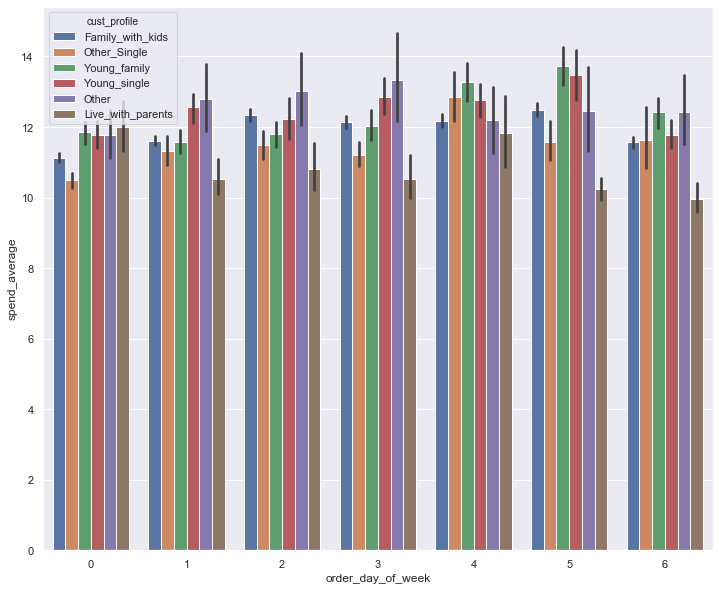

In [139]:
# Creating graph to look average spend throughout the week by customer profile
ix = sns.barplot(x = 'order_day_of_week', y = 'spend_average', hue = 'cust_profile', data = small)

In [140]:
# Saving the fig
ix.figure.savefig(os.path.join(path, 'cust_week_spend_avg.png'))

In [167]:
# Grouping Regions and looking at order frequencies
kxg = df4.groupby(['Gender','fam_status']).agg({'user_id' : 'count','Age': ['mean', 'max', 'min'], 'income' : 'mean'})

In [168]:
# Check
kxg

user_id        Age          \
                                            count       mean max min   
Gender fam_status                                                      
Female divorced/widowed                   1401852  70.555288  81  60   
       living with parents and siblings    758310  19.509611  21  18   
       married                           11303254  51.545987  81  22   
       single                             2638003  38.668456  59  18   
Male   divorced/widowed                   1372006  70.470448  81  60   
       living with parents and siblings    793553  19.497940  21  18   
       married                           11469173  51.427887  81  22   
       single                             2691752  38.529797  59  18   

                                                income  
                                                  mean  
Gender fam_status                                       
Female divorced/widowed                  115193.502374  
       living with parents and siblings   70932.422380  
       married                           101686.814681  
       single                             91344.173372  
Male   divorced/widowed                  116075.634706  
       living with parents and siblings   70429.786439  
       married                           100906.971823  
       single                             91281.426787

In [169]:
# looking up customers by Gender
df4['Gender'].value_counts()

Male      16326484
Female    16101419
Name: Gender, dtype: int64

In [173]:
# Grouping fam statuses and popular department 
df4.groupby('fam_status').department.apply(lambda x: x.mode())

fam_status                         
divorced/widowed                  0    produce
living with parents and siblings  0    produce
married                           0    produce
single                            0    produce
Name: department, dtype: object

In [176]:
# and polular product small.groupby('cust_profile').product_name.apply(lambda x: x.mode())

cust_profile        
Family_with_kids   0    Banana
Live_with_parents  0    Banana
Other              0    Banana
Other_Single       0    Banana
Young_family       0    Banana
Young_single       0    Banana
Name: product_name, dtype: object

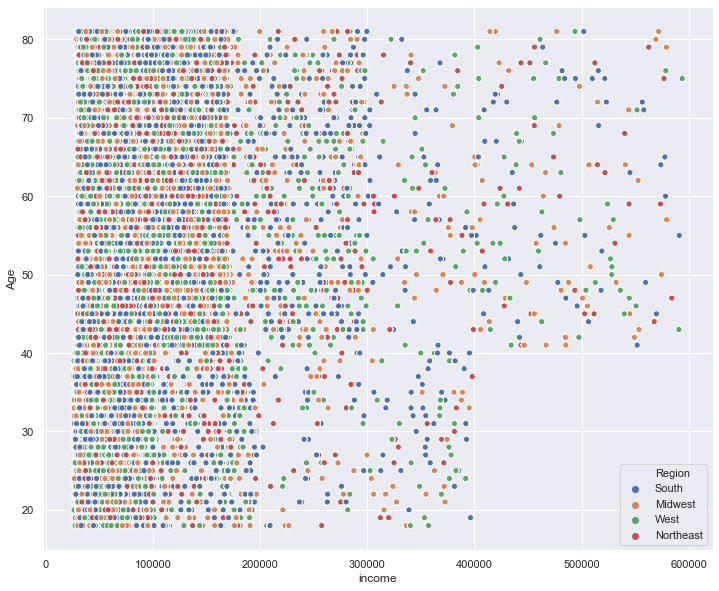

In [180]:
lx = sns.scatterplot(x = 'income', y = 'Age', data = small, hue = 'Region')

In [186]:
# Saving the fig
lx.figure.savefig(os.path.join(path, 'age_income_scatter.png'))

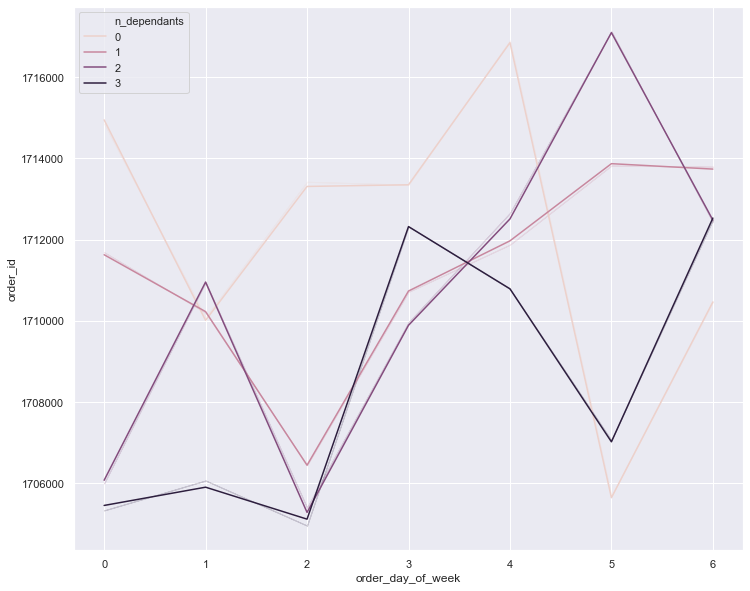

In [201]:
#looking at customers order patern throughout the day and breaking down how many dependants they have 
nx = sns.lineplot(x = 'order_day_of_week', y = 'order_id', hue = 'n_dependants', data = small, ci = False)

In [202]:
# Saving the fig
nx.figure.savefig(os.path.join(path, 'Weekorderpatern_with_kids.png'))

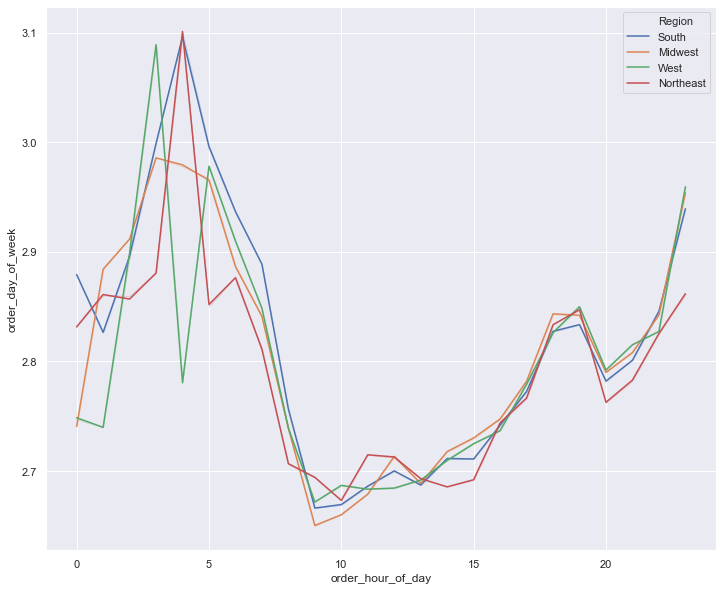

In [215]:
rx = sns.lineplot(x = 'spend_average', y = 'order_day_of_week', hue = 'Region', data = small, ci = False)

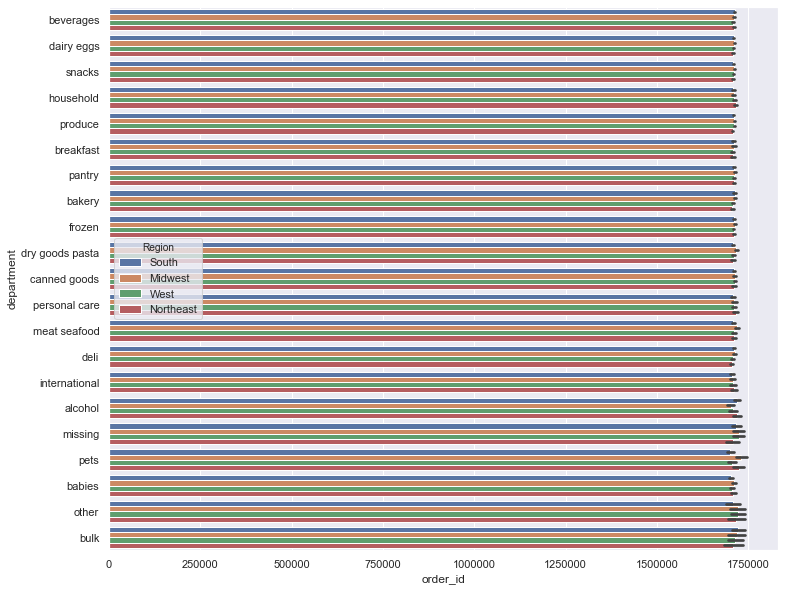

In [211]:
# bar plot to see products ordered from each departments by Regions
px = sns.barplot(x = 'spend_average', y = 'department', hue = 'Region', orient = 'h' ,data = df4)

In [214]:
# Groping to see Region spending habits
gpx = df4.groupby(['Region', 'department']).agg({'order_id' : 'count'})

In [218]:
# ability to view first 100 rows
pd.set_option('display.max_rows', 100)

In [220]:
#Check
gpx

order_id
Region    department               
Midwest   alcohol             36186
          babies              98983
          bakery             274777
          beverages          625585
          breakfast          165032
          bulk                 8193
          canned goods       250702
          dairy eggs        1266436
          deli               245678
          dry goods pasta    203769
          frozen             524404
          household          175824
          international       63736
          meat seafood       166130
          missing             16535
          other                8420
          pantry             442134
          personal care      105758
          pets                22356
          produce           2227937
          snacks             673715
Northeast alcohol             26542
          babies              75139
          bakery             209468
          beverages          483422
          breakfast          124889
          bulk                 5802
          canned goods       186755
          dairy eggs         955965
          deli               186817
          dry goods pasta    151816
          frozen             391311
          household          131485
          international       46891
          meat seafood       124621
          missing             12374
          other                6585
          pantry             329479
          personal care       78824
          pets                18601
          produce           1665839
          snacks             514675
South     alcohol             51624
          babies             143654
          bakery             390294
          beverages          898957
          breakfast          236371
          bulk                11533
          canned goods       356015
          dairy eggs        1800177
          deli               349419
          dry goods pasta    287444
          frozen             748463
          household          243070
          international       89142
          meat seafood       235754
          missing             23193
          other               12212
          pantry             622529
          personal care      150386
          pets                31272
          produce           3160551
          snacks             957346
West      alcohol             39344
          babies             106026
          bakery             302248
          beverages          680195
          breakfast          183277
          bulk                 9045
          canned goods       274586
          dairy eggs        1386311
          deli               269335
          dry goods pasta    223598
          frozen             572254
          household          188287
          international       69484
          meat seafood       182426
          missing             17043
          other                9074
          pantry             481435
          personal care      112666
          pets                25495
          produce           2424964
          snacks             741814

In [223]:
# Export to csv
gpx.to_csv(os.path.join(path, 'Prepared Data', 'region_department.csv'))

In [224]:
df4.to_pickle(os.path.join(path, 'Prepared Data', 'Ords_prods_all.pkl'))